In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline

In [85]:
import os
os.getcwd()

'C:\\Users\\fredcorpuz06\\Desktop\\repos\\datafest18\\ntbks'

In [4]:
file_name = 'datafest2018NewApril6'
with open('../data/'+ file_name + '.pickle', 'rb') as handle:
    df = pickle.load(handle)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1763530 entries, 0 to 1763529
Data columns (total 28 columns):
date                          datetime64[ns]
companyId                     object
jobId                         object
country                       object
stateProvince                 object
city                          object
avgOverallRating              float64
numReviews                    float64
industry                      object
normTitle                     object
normTitleCategory             object
descriptionCharacterLength    int64
descriptionWordCount          int64
experienceRequired            float64
estimatedSalary               float64
salaryCurrency                object
jobLanguage                   object
supervisingJob                float64
licenseRequiredJob            float64
educationRequirement          object
jobAgeDays                    int64
clicks                        int64
localClicks                   float64
month                    

### Time-related

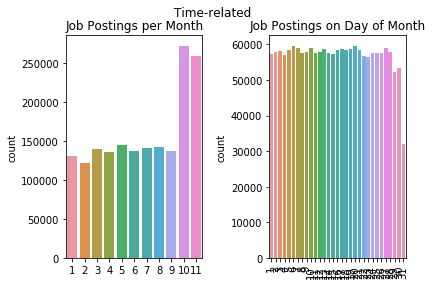

In [110]:
## date  
plt.subplot(1,2,1)
sns.countplot(df.month)
plt.xlabel('')
plt.title(r'Job Postings per Month')

plt.subplot(1,2,2)
sns.countplot(df.day)
plt.xlabel('')
plt.xticks(rotation=90)
plt.title(r'Job Postings on Day of Month')

plt.suptitle('Time-related')
plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.savefig('../output/eda-graphs/time.png')
plt.show()

### Location-Related

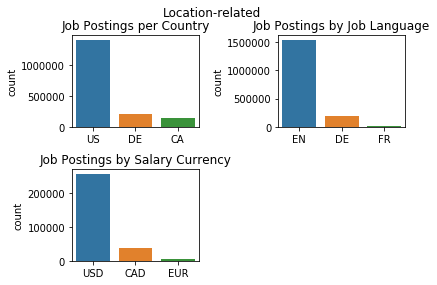

In [111]:
## country 
plt.subplot(2,2,1)
sns.countplot(df.country)
plt.xlabel('')
plt.title(r'Job Postings per Country')   

## jobLanguage 
plt.subplot(2,2,2)
sns.countplot(df.jobLanguage)
plt.xlabel('')
plt.title(r'Job Postings by Job Language')

## salaryCurrency 
plt.subplot(2,2,3)
sns.countplot(df.salaryCurrency)
plt.xlabel('')
plt.title(r'Job Postings by Salary Currency')

plt.suptitle('Location-related')
plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.savefig('../output/eda-graphs/location.png')
plt.show()

### Posting Details

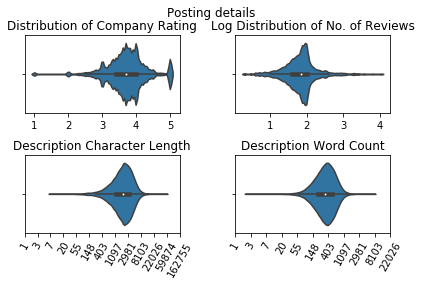

In [112]:
## avgOverallRating 
plt.subplot(2,2,1)
sns.violinplot(df.avgOverallRating)
plt.xlabel('')
plt.title(r'Distribution of Company Rating')

## numReviews     
plt.subplot(2,2,2)
sns.violinplot(df.numReview_log)
plt.xlabel('')
plt.title(r'Log Distribution of No. of Reviews')                    

## descriptionCharacterLength  
plt.subplot(2,2,3)
sns.violinplot(np.log(df.descriptionCharacterLength))
i = 13
num_exp = [str(np.rint(x).astype(int)) for x in np.exp(np.arange(i))]
plt.xticks(np.arange(i), num_exp, rotation=60)
plt.xlabel('')
plt.title(r'Description Character Length')

## descriptionWordCount     
plt.subplot(2,2,4)
sns.violinplot(np.log(df.descriptionWordCount))
i = 11
num_exp = [str(np.rint(x).astype(int)) for x in np.exp(np.arange(i))]
plt.xticks(np.arange(i), num_exp, rotation=60)
plt.xlabel('')
plt.title(r'Description Word Count')

plt.suptitle('Posting details')
plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.savefig('../output/eda-graphs/posting.png')
plt.show()

### Requirements/Compensation

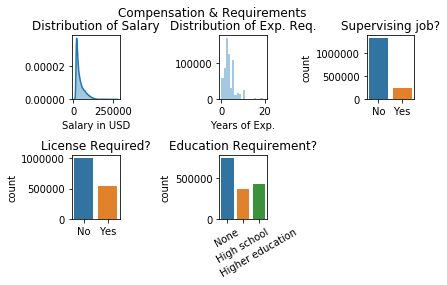

In [113]:
## estimatedSalary
plt.subplot(2,3,1)
sns.distplot(df.estimatedSalary.dropna(), kde=True) ## look at salary across industry
plt.xlabel('Salary in USD')
plt.title(r'Distribution of Salary')

## experienceRequired  
plt.subplot(2,3,2)
sns.distplot(df.experienceRequired.dropna(), kde=False, bins=20) 
plt.xlabel('Years of Exp.')
plt.title('Distribution of Exp. Req.')

## supervisingJob    
plt.subplot(2,3,3)
sns.countplot(df.supervisingJob)
plt.xticks(np.arange(2), ('No', 'Yes'))
plt.title('Supervising job?')
plt.xlabel('')

## licenseRequiredJob  
plt.subplot(2,3,4)
sns.countplot(df.licenseRequiredJob) 
plt.xticks(np.arange(2), ('No', 'Yes'))
plt.title(r'License Required?')
plt.xlabel('')

## educationRequirement  
plt.subplot(2,3,5)
sns.countplot(df.educationRequirement)
plt.xticks(rotation=30)
plt.title(r'Education Requirement?')
plt.xlabel('')

plt.suptitle('Compensation & Requirements')
plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.savefig('../output/eda-graphs/comp-req.png')
plt.show()

### Job Popularity Related

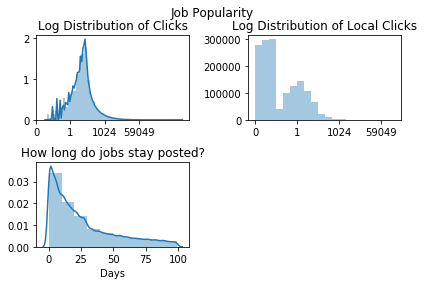

In [152]:
## clicks    
plt.subplot(2,2,1)
sns.distplot(df.clicks_log.dropna())
i = 4
num_exp = [str(np.rint(x).astype(int)) for x in np.power(np.arange(i), 10)]
plt.xticks(np.arange(i), num_exp)
plt.xlabel('')
plt.title(r'Log Distribution of Clicks')


## localClicks    
plt.subplot(2,2,2)
sns.distplot(df.localClicks_log.dropna(), bins=20, kde=False)
i = 4
num_exp = [str(np.rint(x).astype(int)) for x in np.power(np.arange(i), 10)]
plt.xticks(np.arange(i), num_exp)
plt.xlabel('')
plt.title(r'Log Distribution of Local Clicks')

## jobAgeDays   
plt.subplot(2,2,3)
sns.distplot(df.jobAgeDays.dropna(), kde=True, bins=10)
plt.title(r'How long do jobs stay posted?')
plt.xlabel('Days')


plt.suptitle('Job Popularity')
plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.savefig('../output/eda-graphs/popularity.png')
plt.show()

### Large No. of Unique Values

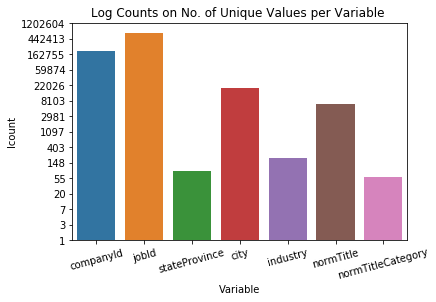

In [155]:
## companyId
## jobId     
## stateProvince                 
## city  
## industry  
## normTitle                     
## normTitleCategory  
sel = ['companyId', 'jobId', 'stateProvince', 'city', 'industry', 'normTitle', 'normTitleCategory']
var_counts = df.loc[:, sel].apply(lambda x: len(x.unique()))
var_counts = var_counts.to_frame(name='count')
var_counts.reset_index(level=0, inplace=True)
var_counts['lcount'] = np.log(var_counts['count'])

sns.barplot(x='index', y='lcount', data=var_counts)
plt.xticks(rotation=15)
plt.xlabel('Variable')
i = 15
num_exp = [str(np.rint(x).astype(int)) for x in np.exp(np.arange(i))]
plt.yticks(np.arange(i), num_exp)
plt.title(r'Log Counts on No. of Unique Values per Variable ')

plt.savefig('../output/eda-graphs/other-vars.png')
plt.show()